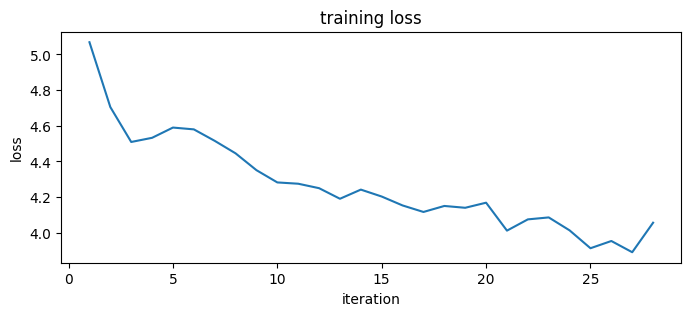

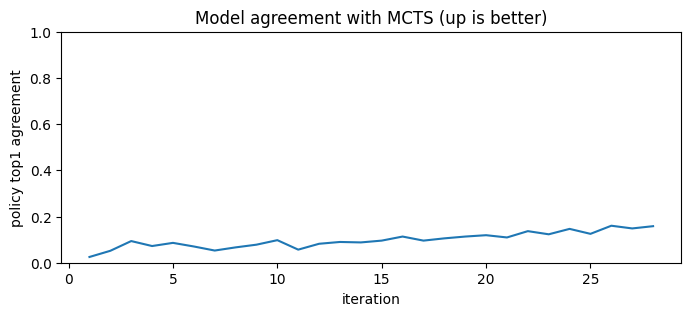

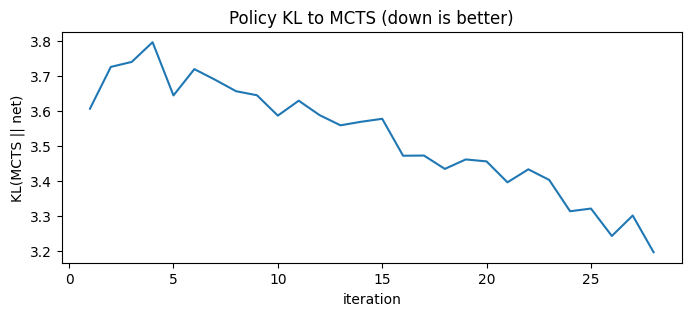

In [ ]:
import glob, torch
import matplotlib.pyplot as plt

files = sorted(glob.glob("checkpoints/run-*.pt"))

iters, losses, agree, kl = [], [], [], []

for f in files:
    ckpt = torch.load(f, map_location="cpu", weights_only=False)
    s = ckpt.get("stats", {})
    if not s: 
        continue
    iters.append(s["iter"])
    losses.append(s["loss"])
    agree.append(s["policy_top1_agree"])
    kl.append(s["policy_kl"])

plt.figure(figsize=(6, 2))
plt.plot(iters, losses)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("training loss")
plt.show()

plt.figure(figsize=(6, 2))
plt.plot(iters, agree)
plt.ylim(0, 1)
plt.xlabel("iteration")
plt.ylabel("policy top1 agreement")
plt.title("Model agreement with MCTS (up is better)")
plt.show()

plt.figure(figsize=(6, 2))
plt.plot(iters, kl)
plt.xlabel("iteration")
plt.ylabel("KL(MCTS || net)")
plt.title("Policy KL to MCTS (down is better)")
plt.show()